<center> <img src='https://www.cm-santarem.pt/images/santarem/covid19/ARECOVID.jpg' width="950" height="250"> </center>

# Deep Learning Project <img align='right' width='120' height='130' src='https://maiseducativa.com/wp-content/uploads/2015/02/Logo_Nova-IMS.jpg'>
<p>
<p>    
    

## <font color='SeaGreen'>__Exploration__</font><br>

>> __João Malho, nº20220696__ , m20220696@novaims.unl.pt<p>
    
***

### 💾 Data 

All jupyter notebooks must be in the same folder with this data downloaded.
It's a directory structure __branched into test and train and further branched into the respective 3 classes__ which contains the Chest X-rays images.

__Source:__ https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
    
## <center> __Lung Virus Detection__ </center>    
    
### 📖 Introduction
    

Within the scope of __Deep Learning__, it was proposed a project, where the student's ability to __build an Image Classification model__ following a specific challenge would be tested. It was proposed to create a __sequencial model in a greedy iterative manner__ so that the students would be able to test several parameters and analyze their impact on the models. The project __will be divided into 5 notebooks__:

> 1. __Exploration__ - Data Collection and Analysis  <br>
> 2. __Preprocessing__ - Data Process for Modelling <br>
> 3. __Models Without Data Augmentation__ - Models Construction <br>
> 4. __Models Without Oversampling__ - Models Construction <br>
> 5. __Models With Data Augmentation & Oversampling__ - Models Construction <br>

### 🔍 The Problem 

The group came across an __interesting thread in _Kaggle_ where the authors published  Chest X-rays images so that Deep Learning and AI Enthusiasts can contribute to improving COVID-19 detection using just Chest X-rays__, their objective was to __"Help the medical and researcher community and encourage them to contribute extensively."__ 

__COVID-19 and Viral Pneumonia have become a major public health concern since the emergence of the COVID-19 pandemic__. In this case, __the human can't detect visually the patterns that show if a patient is diseased or not__ In recent years, __Deep Learning models have shown promising results in medical image analysis__, especially in the field of radiology.

The group aims to tackle this problem by __developing a COVID-19 and Viral Pneumonia detector using Deep Learning techniques__. Specifically, the use of __several convolutional neural networks (CNN) models such as VGG and ResNet__, in a __greedy optimization way to find the optimal hyperparameters for the model__. The model will take __Chest X-ray images as input and output a classification__ indicating whether the patient is infected with COVID-19 or viral pneumonia, or not infected at all.

In [5]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
# Dataset folder
folder_path = os.path.join(os.getcwd(), r'Covid19-dataset')

# Get the list of files and directo
# ries in the folder
folder_contents = os.listdir(folder_path)

# Print the contents of the folder
print('Subfolders:\n')
for item in folder_contents:
    print('   '+item)

Subfolders:

   test
   train


In [7]:
# Loop through all files and subfolders within the root folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # Do something with each file
        print(os.path.join(root, file))

c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0100.jpeg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0102.jpeg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0105.png
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0106.jpeg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0108.jpeg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0111.jpg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0112.jpg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0113.jpg
c:\Users\joaom\0. Nova IMS\2ºSemestre\Deep Learning\Project\Final\Final\Covid19-dataset\test\Covid\0115.jpeg
c:\Users\joaom\0. Nova 

In [8]:
# Check the number of files
test_covid = folder_path + r'/test/Covid'
test_normal = folder_path + r'/test/Normal'
test_viral = folder_path + r'/test/Viral Pneumonia'

train_covid = folder_path + r'/train/Covid'
train_normal = folder_path + r'/train/Normal'
train_viral = folder_path + r'/train/Viral Pneumonia'

print('Total Training Covid Images: ', len(os.listdir(train_covid)))
print('Total Training Normal Images: ', len(os.listdir(train_normal)))
print('Total Training Viral Images: ', len(os.listdir(train_viral)), '\n')
print('Total Testing Covid Images: ', len(os.listdir(test_covid)))
print('Total Testing Normal Images: ', len(os.listdir(test_normal)))
print('Total Testing Viral Images: ', len(os.listdir(test_viral)),'\n')

print('Total train images: ', len(os.listdir(train_covid)) + len(os.listdir(train_normal)) + len(os.listdir(train_viral)) )
print('Total test images: ', len(os.listdir(test_covid)) + len(os.listdir(test_normal)) + len(os.listdir(test_viral)) )

Total Training Covid Images:  111
Total Training Normal Images:  111
Total Training Viral Images:  111 

Total Testing Covid Images:  26
Total Testing Normal Images:  20
Total Testing Viral Images:  20 

Total train images:  333
Total test images:  66


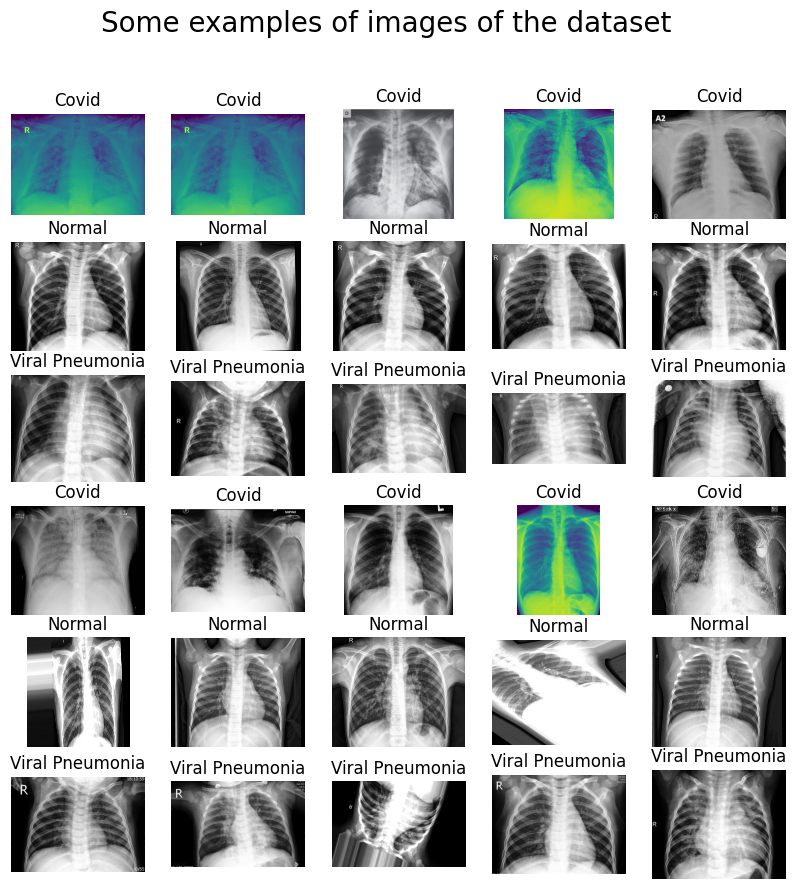

In [9]:
# funtion to display x images per folder

def display_random_images(folders, num_images):
    fig, axs = plt.subplots(len(folders), num_images, figsize=(10,10))
    
    for i, folder in enumerate(folders):
        images = os.listdir(folder)
        random.shuffle(images)
        for x in range(num_images):
            img_path = os.path.join(folder, images[x])
            img = Image.open(img_path)
            axs[i,x].imshow(img)
            axs[i,x].axis('off')
            axs[i,x].set_title(os.path.basename(folder))
        plt.suptitle('Some examples of images of the dataset', fontsize=20)

    plt.show()
    
# Folders paths
test_covid = folder_path + r'/test/Covid'
test_normal = folder_path + r'/test/Normal'
test_viral = folder_path + r'/test/Viral Pneumonia'

train_covid = folder_path + r'/train/Covid'
train_normal = folder_path + r'/train/Normal'
train_viral = folder_path + r'/train/Viral Pneumonia'
folders = [test_covid, test_normal, test_viral, train_covid, train_normal, train_viral]

num_images = 5

display_random_images(folders, num_images)

__Notes:__

* Colors can be ignored, are due page formatation

* As we can see, the lungs X-ray images above are not similar. 

* They differ in contrast, positioning and noise, some images include letters, white sections, and some lines. Furthermore, not every lung represented in the photos is the same. These variances provide difficulties for neural network. In order to correctly categorize and evaluate these X-ray images, model needs to be able to discriminate between the variances and extract same size and imagem details information from each.

In [10]:
# create label distribution of training data for further investigation
label_dist = {}
for img_class in os.listdir(folder_path + '/train'):
    counter = 0 
    for img in os.listdir(folder_path + '/train/' +  img_class):
        counter += 1 
    label_dist[img_class] = counter

inverse_class_weights = [1 / (count / sum(label_dist.values())) for count in label_dist.values()]

fig = go.Figure(data=[go.Pie(labels=np.asarray([k for k in label_dist.keys()]),
                            values=np.asarray([v for v in label_dist.values()]),
                            hole=.5,
                            textinfo='label+percent',
                            insidetextorientation='radial',
                            textposition='outside',
                            marker=dict(colors=["#9E0142", "#D53E4F", "#F46D43"])
                            )])

fig.update_layout(title='<b>Train Set Class Balance</b>',
                title_x=0.5 ,
                title_y=0.95,
                font_size = 14,
                width = 900,
                height = 500,
                template = 'plotly_dark')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hole': 0.5,
              'insidetextorientation': 'radial',
              'labels': array(['Covid', 'Normal', 'Viral Pneumonia'], dtype=object),
              'marker': {'colors': ['#9E0142', '#D53E4F', '#F46D43']},
              'textinfo': 'label+percent',
              'textposition': 'outside',
              'type': 'pie',
              'values': array([111, 111, 111])}],
    'layout': {'font': {'size': 14},
               'height': 500,
               'template': '...',
               'title': {'text': '<b>Train Set Class Balance</b>', 'x': 0.5, 'y': 0.95},
               'width': 900}
})

__Notes:__

* The chart above illustrates the disproportionate distribution of X-ray images by class. 

* Is noted, there exist more images about COVID-19 than Normal and Viral Pneumonia. 

* The model's performance may suffer from such an imbalance in data distribution because it may start to favour the class that is the majority. 

* In this scenario, the COVID-19 class may predominate the model's predictions while the other classes are not well analysed, resulting in decreased accuracy and diminished effectiveness. Therefore, it is essential to choose an appropriate evaluation metric that is less prone to class imbalance issues, rather than simply relying on accuracy. 

* We need to use a technique to balance the dataset in order to solve this problem.

### Some theory to take into consideration in the future

__Interpretation__

A convolutional neural network can have tens or hundreds of layers that each learns to detect different features of an image. Filters are applied to each training image at different resolutions, and the output of each convolved image is used as the input to the next layer. The filters can start as very simple features, such as brightness and edges, and increase in complexity to features that uniquely define the object.

A CNN is composed of an input layer, an output layer, and many hidden layers in between.

<img src='https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network-matlab/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_792810770_copy.adapt.full.medium.jpg/1678866393917.jpg' width="750" height="350">
 
These layers perform operations that alter the data with the intent of learning features specific to the data. Three of the most common layers are convolution, activation or ReLU, and pooling.

*** 

## __Convolution__ 

* Is a main building block, regards a mathematical operation on two function to produce a 3rd function that express how the shape of one is modified by the other.
* Regarding images, images are composed by pixeis, usually form 0 to 255 pixeis (image 1)

_image 1_

<img src='https://ikhlestov.github.io/images/machine-learning/convolutional-layers/03_simple_gray_image.png' width="750" height="350">


* Is noted a pattern on the image, and is possible to apply a convolutional on it.

### __Simple Convolution__

* Center element of the kernel is placed over the source pixel, the source pixel is then replaced with the weighted sum of itself and nearby pixels.

<img src='https://ikhlestov.github.io/images/ML_notes/convolutions/01_simple_convolution.jpg' width="550" height="350">


### __1x1 Convolutions__

* Used for ‘Cross Channel Down sampling’ or Cross Channel Pooling. In other words, 1X1 Conv was used to reduce the number of channels while introducing non-linearity.

* In 1X1 Convolution simply means the filter is of size 1X1 (that means a single number as opposed to matrix like, say 3X3 filter). This 1X1 filter will convolve over the ENTIRE input image pixel by pixel.

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*dNaikOfrGzUaJ2EzRIl4tw.png' width="550" height="350">

### __Flattened Convolutions__

* Same as 1x1 convs from NiN networks, but now not only features dimension set to 1, but also one of another dimensions: width or height.

<img src='https://ikhlestov.github.io/images/ML_notes/convolutions/03_flattened_convs.png' width="750" height="150">

### __Spatial and Cross-Channel convolutions__

* Spatial convolutions means convolutions performed in spatial dimensions - width and height.

*** 

## __Activation Funcitons__ 

* Decides whether a neuron should be activated or not. This means that it will decide whether the neuron’s input to the network is important or not in the process of prediction using simpler mathematical operations.

#### These will be the Activation Functions tested: 

### __Sigmoid__:    
>>$S(z)=\frac{1}{1+e^{-z}}$

* __Advantages__ : It’s non-linear, continuously differentiable, monotonic, and has a fixed output range [0,1]. The main advantage is simple and good for classifier.

* __Disadvantages__ : It __gives rise to vanishing gradients__ (When there are more layers in the network, the value of the product of derivative decreases until at some point the partial derivative of the loss function approaches a value close to zero, and the partial derivative vanishes), the problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training

<center><img src='https://www.researchgate.net/publication/263163878/figure/fig3/AS:296411938738184@1447681521614/The-logistic-sigmoid-activation-function.png' width="600" height="350"></center>
<br>
<br>
<br>

### __Tanh__:
>>$tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$

* __Advantages__ : Tanh squashes a real-valued number to the range [-1, 1], solving the non zero centered problem of sigmoid. It’s non-linear too.`

* __Disadvantages__ : Still can’t remove the vanishing gradient problem completely.`

<center><img src='https://i0.wp.com/sefiks.com/wp-content/uploads/2017/01/tanh.png?resize=456%2C300&ssl=1' width="600" height="350"></center>
<br>
<br>
<br>

### __RelU (Rectified Linear Unit):__
>> $\begin{cases}
          z, & \text{if } z > 0 \
          0, & \text{if } z \leq 0
        \end{cases}$
* __Advantages__ :  The most popular activation function for hidden layers, it avoids and rectifies the vanishing gradient problem and is less computationally expensive than Tanh and Sigmoid. Short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

* __Disadvantages__ : Sometimes some gradients can be fragile during training and can die. That leads to dead neurons. In other words, for activations in the region (x<0) of ReLu, the gradient will be 0 because of which the weights will not get adjusted during descent. That means, those neurons which go into that state will stop responding to variations in error/ input (simply because the gradient is 0, nothing changes).`

<center><img src='https://michielstraat.com/talk/mastertalk/featured.png' width="600" height="350"></center>
<br>
<br>
<br>


### __Softmax:__

* It's used at the last layer of the neural network which calculates the probabilities distribution of the event over ’n’ different events. The main advantage of the function can handle multiple classes and due to the nature of this project, this will be the function used in the fully connected layers to do the classification.`

* Add decimal probabilities to each class, this decimal probability in total is 1,0.

<center><img src='https://ambrapaliaidata.blob.core.windows.net/ai-storage/articles/6.jpg' width="600" height="350"></center>

*** 

## __Pooling__ 

* Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

<img src='https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network-matlab/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_2109075398_cop.adapt.full.medium.jpg/1678866394015.jpg' width="750" height="350">